In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Big thanks to 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Nanopore time series data was generated using a high-throughput nanopore sensor array on a set of engineered proteins. Each instance is a 1 second (10k obs) ionic current signature generated during capture of the protein in the nanopore. Ionic current signature is normalized to open channel, thus ranges from 0 to 1 (fractional current blockage). This data set contains data from 12 different classes (0,1,2,3,4,5,6,7,8,9,20,21,22), with 4000 instances from each class (48k total examples).

In [0]:
Y0to8_QTP29_classes = np.load(open('/content/drive/My Drive/Nanopore Data for Aaayush/Y0to8_QTP29_classes.npy'))
Y0to8_QTP29_raw_windows = np.load(open('/content/drive/My Drive/Nanopore Data for Aaayush/Y0to8_QTP29_raw_windows.npy'))

In [4]:
print np.shape(Y0to8_QTP29_classes)
print np.shape(Y0to8_QTP29_raw_windows)

(48000,)
(48000, 10000)


In [42]:
#option to decrease duration of capture time
#Y0to8_QTP29_raw_windows = Y0to8_QTP29_raw_windows[:,:1000]
#print np.shape(Y0to8_QTP29_raw_windows)

(48000, 1000)


In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
#make train, val, and test sets

X_train = Y0to8_QTP29_raw_windows.reshape(48000, 10000, 1)
#X_train = np.transpose(sw_list_0102_3deep, (0, 2, 1))
labels_train = Y0to8_QTP29_classes

#X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train, stratify = labels_train, random_state = 123)

X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train, stratify = labels_train, train_size = 0.8)
print np.shape(lab_tr)
print np.shape(lab_vld)



#X_tr, X_test, lab_tr, lab_test = train_test_split(X_tr, lab_tr, stratify = lab_tr, random_state=123)

#X_tr, X_test, lab_tr, lab_test = train_test_split(X_tr, lab_tr, stratify = lab_tr)

X_vld, X_test, lab_vld, lab_test = train_test_split(X_vld, lab_vld, stratify = lab_vld)


print np.shape(lab_tr)
print np.shape(lab_vld)
print np.shape(lab_test)


def one_hot(labels, n_class = 22):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

def one_hot_y_vld(labels, n_class = 22):
    """ One-hot encoding """
    print labels
    print np.shape(labels)
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    print y
    print np.shape(y)
    print y.shape[1]
    y = y.reshape(7200,22) #0.25 of the data, labels
    print y
    print np.shape(y)
    print y.shape[1]
    assert y.shape[1] == n_class, "Wrong number of labels!"
    return y

def one_hot_y_tr(labels, n_class = 22):
    """ One-hot encoding """
    print labels
    print np.shape(labels)
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    print y
    print np.shape(y)
    print y.shape[1]
    y = y.reshape(38400,22) #0.56248 of the data, labels
    print y
    print np.shape(y)
    print y.shape[1]
    assert y.shape[1] == n_class, "Wrong number of labels!"
    return y

def one_hot_y_test(labels, n_class = 22):
    """ One-hot encoding """
    print labels
    print np.shape(labels)
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    print y
    print np.shape(y)
    print y.shape[1]
    y = y.reshape(2400,22) #0.18752 of the data, labels
    print y
    print np.shape(y)
    print y.shape[1]
    assert y.shape[1] == n_class, "Wrong number of labels!"
    return y

#print labels
print np.shape(lab_tr)
print np.shape(lab_vld)
print np.shape(lab_test)

y_tr = one_hot_y_tr(lab_tr.astype(int))

y_vld = one_hot_y_vld(lab_vld.astype(int))

y_test = one_hot_y_test(lab_test.astype(int))



#y_test = one_hot(labels_test.astype(int))

#y_tr = lab_tr.astype(int)
#y_vld = lab_vld.astype(int)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(38400,)
(9600,)
(38400,)
(7200,)
(2400,)
(38400,)
(7200,)
(2400,)
[ 1  0  8 ...  7 20  4]
(38400,)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(38400, 22)
22
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(38400, 22)
22
[ 7  5  5 ...  5  8 20]
(7200,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(7200, 22)
22
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(7200, 22)
22
[ 5  0 20 ... 22  3 21]
(2400,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]

In [0]:
def get_batches(X, y, batch_size = 600):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

In [0]:
batch_size = 600       # Batch size
seq_len = 10000          # Number of steps
learning_rate = 0.0001

epochs = 20

n_classes = 22
n_channels = 1

In [0]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

In [21]:
with graph.as_default():
    # (batch, 10000, 1) --> (batch, 5000, 18)
    print 'hello'
    conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=80, strides=1,
                             padding='same', activation = tf.nn.relu)
    max_pool_1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2, padding='same')
    
    # (batch, 5000, 18) --> (batch, 2500, 36)
    conv2 = tf.layers.conv1d(inputs=max_pool_1, filters=36, kernel_size=80, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2, padding='same')
    
    # (batch, 2500, 36) --> (batch, 1250, 72)
    conv3 = tf.layers.conv1d(inputs=max_pool_2, filters=72, kernel_size=80, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_3 = tf.layers.max_pooling1d(inputs=conv3, pool_size=2, strides=2, padding='same')
    
    # (batch, 1250, 72) --> (batch, 625, 144)
    conv4 = tf.layers.conv1d(inputs=max_pool_3, filters=144, kernel_size=80, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_4 = tf.layers.max_pooling1d(inputs=conv4, pool_size=2, strides=2, padding='same')
    
    # (batch, 8, 144) --> (batch, 4, 288)
    #conv5 = tf.layers.conv1d(inputs=max_pool_4, filters=288, kernel_size=8, strides=1, 
    #                         padding='same', activation = tf.nn.relu)
    #max_pool_5 = tf.layers.average_pooling1d(inputs=conv5, pool_size=2, strides=2, padding='same')
    
    
    
    print np.shape (conv1)
    print np.shape (max_pool_1)
    print np.shape (conv2)
    print np.shape (max_pool_2)
    print np.shape (conv3)
    print np.shape (max_pool_3)
    print np.shape (conv4)
    print np.shape (max_pool_4)
    #print np.shape (conv5)
    #print np.shape (max_pool_5)

hello
(?, 10000, 18)
(?, 5000, 18)
(?, 5000, 36)
(?, 2500, 36)
(?, 2500, 72)
(?, 1250, 72)
(?, 1250, 144)
(?, 625, 144)


In [22]:
with graph.as_default():
    # Flatten and add dropout
    print np.shape (max_pool_4)
    flat = tf.reshape(max_pool_4, (-1, 625*144))
    #flat = tf.reshape(max_pool_4, (-1, 313*288))
    flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
    
    # Predictions
    logits = tf.layers.dense(flat, n_classes)
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))

    #cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_)) #added
    optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

(?, 625, 144)


In [23]:


validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 5 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 10 iterations
            if (iteration%10 == 0):                
                val_acc_ = []
                val_loss_ = []
                
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0}  
                    
                    # Loss
                    loss_v, acc_v = sess.run([cost, accuracy], feed_dict = feed)                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
            
    saver.save(sess,"checkpoints-cnn/har.ckpt")

('Epoch: 0/20', 'Iteration: 5', 'Train loss: 2.573251', 'Train acc: 0.181667')
('Epoch: 0/20', 'Iteration: 10', 'Train loss: 2.376937', 'Train acc: 0.165000')
('Epoch: 0/20', 'Iteration: 10', 'Validation loss: 2.387680', 'Validation acc: 0.166667')
('Epoch: 0/20', 'Iteration: 15', 'Train loss: 2.457386', 'Train acc: 0.138333')
('Epoch: 0/20', 'Iteration: 20', 'Train loss: 2.389668', 'Train acc: 0.123333')
('Epoch: 0/20', 'Iteration: 20', 'Validation loss: 2.368224', 'Validation acc: 0.166667')
('Epoch: 0/20', 'Iteration: 25', 'Train loss: 2.378735', 'Train acc: 0.140000')
('Epoch: 0/20', 'Iteration: 30', 'Train loss: 2.328423', 'Train acc: 0.195000')
('Epoch: 0/20', 'Iteration: 30', 'Validation loss: 2.352627', 'Validation acc: 0.166667')
('Epoch: 0/20', 'Iteration: 35', 'Train loss: 2.363002', 'Train acc: 0.171667')
('Epoch: 0/20', 'Iteration: 40', 'Train loss: 2.355801', 'Train acc: 0.160000')
('Epoch: 0/20', 'Iteration: 40', 'Validation loss: 2.341551', 'Validation acc: 0.166667')
(

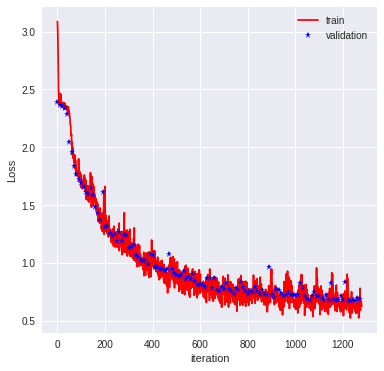

In [24]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 10 == 0], np.array(validation_loss), 'b*')
#plt.plot(t, np.array(train_loss), 'r-', [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320], np.array(validation_loss), 'b*')

plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

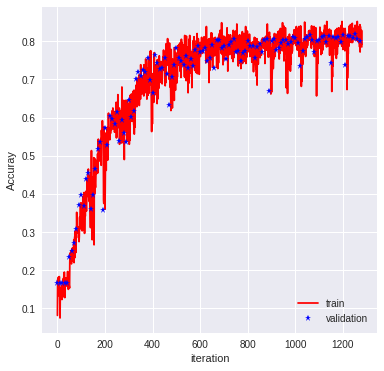

In [25]:
# Plot Accuracies
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 10 == 0], validation_acc, 'b*')
#plt.plot(t, np.array(train_acc), 'r-', [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [26]:
test_acc = []


with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints-cnn'))
    
    #for x_t, y_t in get_batches(X_test, lab_test, batch_size):
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1}
        
        batch_acc = sess.run(accuracy, feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints-cnn/har.ckpt
Test accuracy: 0.810000
